# Example - 57 - Dragnofly (Titan) Entry Tradespace - Carpet Plot

This example will create an EDL carpet plot showning the trade space for Dragnofly entry vehicle at Titan. Based on work presented in "Preliminary Interplanetary Mission Design and Navigation for the Dragonfly New Frontiers Mission Concept, AAS 18-416"

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("TITAN")
planet.h_skip = 1270.0E3
planet.h_trap =    0.0E3
planet.loadAtmosphereModel('../atmdata/Titan/titan-gram-avg.dat', 0 , 1 , 2, 3)

In [4]:
speedRange = np.linspace(7  , 9, 11)
gammaRange = np.linspace(-60,-46, 11)


acc_net_g_max_array       = np.zeros((len(speedRange),len(gammaRange)))
q_stag_total_max_array    = np.zeros((len(speedRange),len(gammaRange)))
heatload_max_array        = np.zeros((len(speedRange),len(gammaRange)))
dyn_pres_array            = np.zeros((len(speedRange),len(gammaRange)))

for i, speed in enumerate(speedRange):
    for j, gamma in enumerate(gammaRange):
        vehicle=Vehicle('Dragonfly', 1000.0, 140.0, 0.0, np.pi*3.7**2.0*0.25, 0.0, 0.43, planet)
        vehicle.setInitialState(1270.0,0.0,0.0,speed,0.0,gamma,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (120*60,1.0,0.0)
        
        print("G_MAX: "+str("{:.2f}".format(max(vehicle.acc_net_g)))+", Q_MAX: "+str("{:.2f}".format(max(vehicle.q_stag_total)))+", J_MAX: "+str("{:.2f}".format(max(vehicle.heatload/1.0E3)))+", P_MAX: "+str("{:.2f}".format(max(vehicle.dyn_pres_atm))))
        
        acc_net_g_max_array[i,j]     = max(vehicle.acc_net_g)
        q_stag_total_max_array[i,j]  = max(vehicle.q_stag_total)
        heatload_max_array[i,j]      = max(vehicle.heatload/1.0E3)
        dyn_pres_array[i,j]         = max(vehicle.dyn_pres_atm)

G_MAX: 16.17, Q_MAX: 158.40, J_MAX: 7.08, P_MAX: 0.22
G_MAX: 15.53, Q_MAX: 155.48, J_MAX: 7.20, P_MAX: 0.21
G_MAX: 14.86, Q_MAX: 152.30, J_MAX: 7.34, P_MAX: 0.20
G_MAX: 14.15, Q_MAX: 148.93, J_MAX: 7.49, P_MAX: 0.19
G_MAX: 13.40, Q_MAX: 145.24, J_MAX: 7.67, P_MAX: 0.18
G_MAX: 12.60, Q_MAX: 141.26, J_MAX: 7.87, P_MAX: 0.17
G_MAX: 11.75, Q_MAX: 136.89, J_MAX: 8.10, P_MAX: 0.16
G_MAX: 10.84, Q_MAX: 132.13, J_MAX: 8.37, P_MAX: 0.15
G_MAX: 9.86, Q_MAX: 126.80, J_MAX: 8.70, P_MAX: 0.13
G_MAX: 8.80, Q_MAX: 120.85, J_MAX: 9.10, P_MAX: 0.12
G_MAX: 7.65, Q_MAX: 114.04, J_MAX: 9.60, P_MAX: 0.10
G_MAX: 17.05, Q_MAX: 171.82, J_MAX: 7.48, P_MAX: 0.23
G_MAX: 16.38, Q_MAX: 168.64, J_MAX: 7.61, P_MAX: 0.22
G_MAX: 15.68, Q_MAX: 165.21, J_MAX: 7.75, P_MAX: 0.21
G_MAX: 14.92, Q_MAX: 161.53, J_MAX: 7.92, P_MAX: 0.20
G_MAX: 14.12, Q_MAX: 157.52, J_MAX: 8.10, P_MAX: 0.19
G_MAX: 13.28, Q_MAX: 153.18, J_MAX: 8.32, P_MAX: 0.18
G_MAX: 12.38, Q_MAX: 148.41, J_MAX: 8.56, P_MAX: 0.17
G_MAX: 11.41, Q_MAX: 143.22, J_

In [5]:
from scipy import interpolate

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


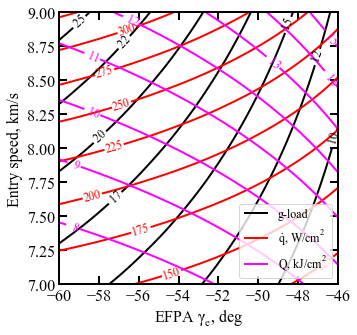

In [6]:

f1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(acc_net_g_max_array), kind='cubic')
q1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(q_stag_total_max_array), kind='cubic')
h1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(heatload_max_array), kind='cubic')
s1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(dyn_pres_array), kind='cubic')

x_new =  np.linspace(7,9 , 110)
y_new =  np.linspace(-60,-46,110)

g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        g1_new[i,j] = f1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])
        
X, Y = np.meshgrid(x_new, y_new)

fig = plt.figure()
fig.set_size_inches([5.00,5.00])
plt.ion()
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

GCS1 = plt.contour(Y, X, np.transpose(g1_new), levels=8, linewidths=2.0, colors='black')
plt.clabel(GCS1, inline=1, fontsize=12, colors='black',fmt='%3d',inline_spacing=1)
GCS1.collections[0].set_label(r'g-load')


QCS1 = plt.contour(Y, X, np.transpose(q1_new),  levels=8, linewidths=2.0, colors='red')
plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%3d',inline_spacing=1)
QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')

HCS1 = plt.contour(Y, X, np.transpose(h1_new), levels=8, linewidths=2.0, colors='magenta')
plt.clabel(HCS1, inline=1, fontsize=12, colors='magenta',fmt='%3d',inline_spacing=1)
HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

plt.xlabel("EFPA "+r'$\gamma_e$'+r', deg' ,fontsize=16)
plt.ylabel(r'Entry speed, km/s' ,fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.legend(loc='lower right', fontsize=12, framealpha=0.8)

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')


ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    
plt.savefig('../plots/dragonfly-sweep.png', dpi=300,bbox_inches='tight')
plt.savefig('../plots/dragonfly-sweep.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/dragonfly-sweep.eps', dpi=300,bbox_inches='tight')

Compare the figure to Fig. 11 presented in the paper. The heat rate and heat loads are somewhat off (by a factor of about 2 in some cases) because of the simple models heating correlations used. This is an area which could be improved in future versions of AMAT.